<a href="https://colab.research.google.com/github/bmustafa225/DS-Portfollio/blob/main/yeg_property_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The purpose of this lab is to explore the property data provided by the City of Edmonton, for the sole purpose of showcasing and practiciing various EDA techniques; as well as building a predictive price model to predict the assessed value of the property with the given variables. We also generate a map of Edmonton with the various properties listed to get an idea of the picture that the data presents!**



In [ ]:
!pip3 install folium
!pip3 install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### EDA

**Upload data and relevant packages**

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [ ]:
yeg_df=pd.read_csv('yeg_property.csv')
print(yeg_df.columns)
yeg_df.head()

Index(['Account Number', 'Suite', 'House Number', 'Street Name', 'Garage',
       'Neighbourhood ID', 'Neighbourhood', 'Ward', 'Assessed Value',
       'Latitude', 'Longitude', 'Point Location', 'Assessment Class % 1',
       'Assessment Class % 2', 'Assessment Class % 3', 'Assessment Class 1',
       'Assessment Class 2', 'Assessment Class 3'],
      dtype='object')


,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194679,NaN,8804.0,MEADOWLARK ROAD NW,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak Ward,305500,53.521347,-113.596600,POINT (-113.59659970742774 53.52134664342154),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,1034321,NaN,11020.0,JASPER AVENUE NW,N,1150.0,OLIVER,O-day'min Ward,62112000,53.541279,-113.511435,POINT (-113.51143504606169 53.541279206311984),95,5.0,NaN,OTHER RESIDENTIAL,COMMERCIAL,NaN
2,1114974,NaN,14902.0,RIO TERRACE DRIVE NW,Y,4430.0,RIO TERRACE,sipiwiyiniwak Ward,842000,53.507602,-113.578589,POINT (-113.57858852769932 53.50760246690828),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,1012293,NaN,15112.0,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,292000,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,1191535,NaN,17528.0,94 STREET NW,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,347500,53.638352,-113.487062,POINT (-113.48706223339036 53.638351849064755),100,NaN,NaN,RESIDENTIAL,NaN,NaN


**Remove unnecessary identifiers and columns**

In [ ]:
yeg_df.drop(['Account Number', 'Suite', 'House Number'],axis=1,inplace=True)
yeg_df.head()

,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,MEADOWLARK ROAD NW,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak Ward,305500,53.521347,-113.596600,POINT (-113.59659970742774 53.52134664342154),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,JASPER AVENUE NW,N,1150.0,OLIVER,O-day'min Ward,62112000,53.541279,-113.511435,POINT (-113.51143504606169 53.541279206311984),95,5.0,NaN,OTHER RESIDENTIAL,COMMERCIAL,NaN
2,RIO TERRACE DRIVE NW,Y,4430.0,RIO TERRACE,sipiwiyiniwak Ward,842000,53.507602,-113.578589,POINT (-113.57858852769932 53.50760246690828),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,292000,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,94 STREET NW,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,347500,53.638352,-113.487062,POINT (-113.48706223339036 53.638351849064755),100,NaN,NaN,RESIDENTIAL,NaN,NaN


In [ ]:
yeg_df['Ward']=yeg_df['Ward'].str.replace('Ward','')
pd.unique(yeg_df['Assessment Class 2'])

array([nan, 'COMMERCIAL', 'RESIDENTIAL', 'FARMLAND', 'OTHER RESIDENTIAL'],
      dtype=object)

In [ ]:
yeg_df['Assessment Class % 2']=yeg_df['Assessment Class % 2'].fillna(0)
yeg_df['Assessment Class % 3']=yeg_df['Assessment Class % 3'].fillna(0)
yeg_df.shape

(416016, 15)

**Obtain a breakdown of the assessed classes of the properties based on the mean Assessed Value of each class**

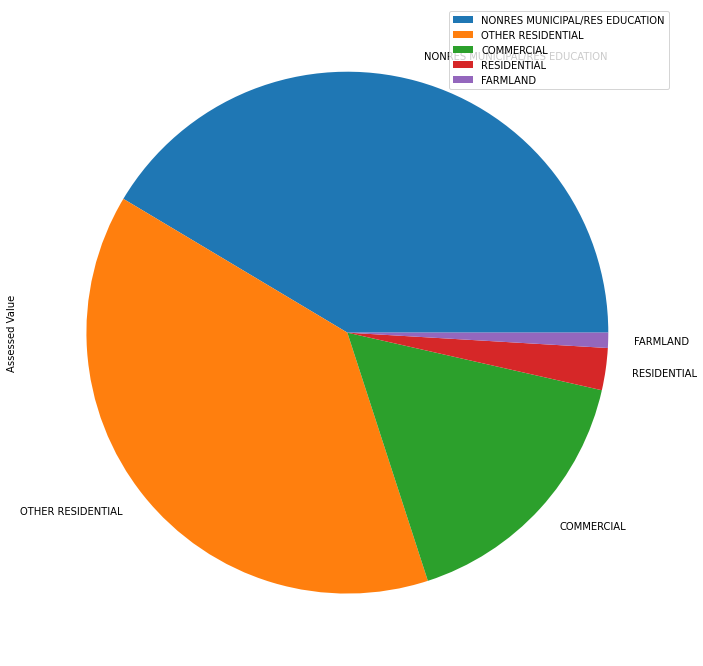

In [ ]:
pie_df=yeg_df.groupby(['Assessment Class 1'])['Assessed Value'].mean().sort_values(ascending=False)

pie_df.plot.pie(x='Assessment Class 1',y='Assessed Value',legend=True,figsize=(12,12))

Classify data in to residential vs commercial

In [ ]:
#residential data filter
res_df=yeg_df[(yeg_df['Assessment Class 1'] =='RESIDENTIAL') | (yeg_df['Assessment Class 1'] =='OTHER RESIDENTIAL')|(yeg_df['Assessment Class 2'] =='RESIDENTIAL')]
res_df=res_df[res_df['Assessment Class % 1'] == 100]

#commercial data filter
comm_df=yeg_df[(yeg_df['Assessment Class 1'] =='COMMERCIAL') | (yeg_df['Assessment Class 2'] =='COMMERCIAL')]
comm_df=comm_df[comm_df['Assessment Class % 1'] == 100]


In [ ]:
print(res_df.shape)
comm_df.shape

(392229, 15)


(22178, 15)

**The colde below is to determine which neighbourhood has the highest number of properties**

In [ ]:
res_df.groupby(['Neighbourhood'])['Garage'].count().nlargest(n=20)

Neighbourhood
OLIVER               11570
DOWNTOWN              9533
WINDERMERE            6079
RUTHERFORD            5476
SUMMERSIDE            5221
SOUTH TERWILLEGAR     5121
WALKER                5050
CHAPPELLE AREA        4483
THE HAMPTONS          4474
LAUREL                4299
STRATHCONA            4005
MCCONACHIE            3911
AMBLESIDE             3744
WESTMOUNT             3439
QUEEN MARY PARK       3187
GARNEAU               3150
ALLARD                3132
MACEWAN               3044
GLASTONBURY           2959
SECORD                2910
Name: Garage, dtype: int64

In [ ]:
comm_df.groupby(['Neighbourhood'])['Garage'].count().nlargest(n=20)

Neighbourhood
DOWNTOWN                           783
STRATHCONA INDUSTRIAL PARK         632
CORONET INDUSTRIAL                 464
ELLERSLIE INDUSTRIAL               410
MISTATIM INDUSTRIAL                410
WINDERMERE                         387
MCCAULEY                           342
OLIVER                             330
STRATHCONA                         315
PARSONS INDUSTRIAL                 309
SOUTHEAST INDUSTRIAL               286
WINTERBURN INDUSTRIAL AREA EAST    283
BOYLE STREET                       276
QUEEN ALEXANDRA                    262
PYLYPOW INDUSTRIAL                 250
KENNEDALE INDUSTRIAL               245
WESTMOUNT                          236
GLENWOOD                           225
CLOVER BAR AREA                    220
WILSON INDUSTRIAL                  209
Name: Garage, dtype: int64

**Next, the residential and commercial neighbourhoods with the highest mean Assessed Value were determned**

In [ ]:
res_garage=res_df.groupby(['Neighbourhood'])[['Garage']].count().reset_index()['Garage']
weight_garage_res=res_garage/sum(res_garage)
weight_garage_res

com_garage=comm_df.groupby(['Neighbourhood'])['Garage'].count().reset_index()['Garage']
weight_garage_comm=com_garage/sum(com_garage)


In [ ]:
#map_df=yeg_df[['Neighbourhood ID', 'Neighbourhood', 'Ward', 'Assessed Value','Latitude', 'Longitude','Garage','Assessment Class % 1','Assessment Class % 2', 'Assessment Class % 3']].sample(80000)
#neigh_df=map_df[('Assessment Class 1' =='RESIDENTIAL') or('Assessment Class 1' ==' OTHER RESIDENTIAL')]
#yeg_df[(yeg_df['Neighbourhood']== 'UNIVERSITY OF ALBERTA') & (yeg_df['Assessment Class 1']== 'OTHER RESIDENTIAL')]

top_res_neigh=res_df.groupby(['Neighbourhood'])['Assessed Value'].mean().nlargest(n=10).reset_index()
top_res_neigh['Weighted Value']=top_res_neigh['Assessed Value']*weight_garage_res
top_res_neigh.sort_values(by='Weighted Value',inplace=True,ascending=False)


weights were added to both DF in order to extract the true represnetation and value of the neighbourhoods; weight= w/sum(w)

In [ ]:
top_comm=comm_df.groupby(['Neighbourhood'])['Assessed Value'].mean().nlargest(n=10).reset_index()
top_comm['Weighted Value']=top_comm['Assessed Value']*weight_garage_comm
top_comm.sort_values(by='Weighted Value',inplace=True,ascending=False)
top_comm

,Neighbourhood,Assessed Value,Weighted Value
2,MILL WOODS PARK,1.512960e+07,118706.335393
7,UNIVERSITY OF ALBERTA FARM,1.169433e+07,64860.125355
3,HERITAGE VALLEY TOWN CENTRE AREA,1.500350e+07,50740.068539
1,WEST MEADOWLARK PARK,2.773535e+07,31265.894846
6,SPRUCE AVENUE,1.267664e+07,27437.373779
0,UNIVERSITY OF ALBERTA,6.632604e+07,26916.821719
4,SUNWAPTA INDUSTRIAL,1.490204e+07,22174.648445
5,RURAL NORTH EAST HORSE HILL,1.355461e+07,16502.434955
8,SOUTH EDMONTON COMMON,1.084227e+07,11244.627739
9,TERRA LOSA,1.061259e+07,3828.322401


**A bar plot for both residential and commercial neighbourhoods was generated**

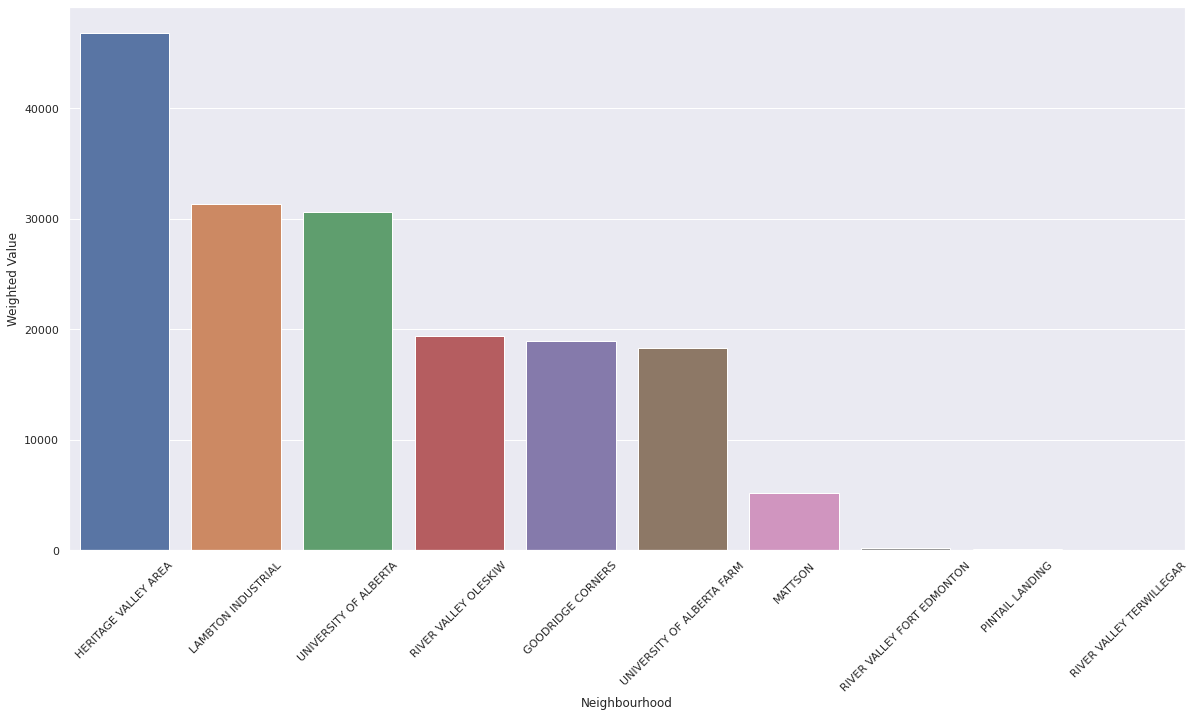

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
bar=sns.barplot(x='Neighbourhood',y='Weighted Value',data=top_res_neigh)
for item in bar.get_xticklabels():
    item.set_rotation(45)


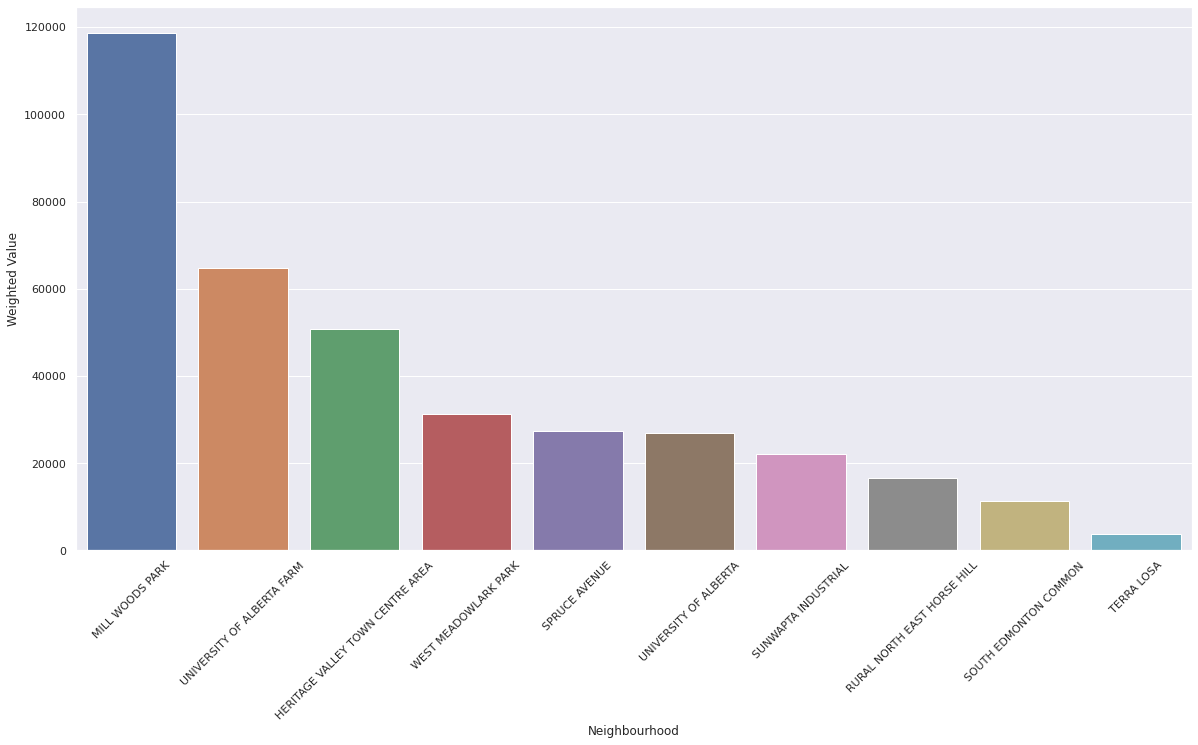

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
bar=sns.barplot(x='Neighbourhood',y='Weighted Value',data=top_comm)
for item in bar.get_xticklabels():
    item.set_rotation(45)


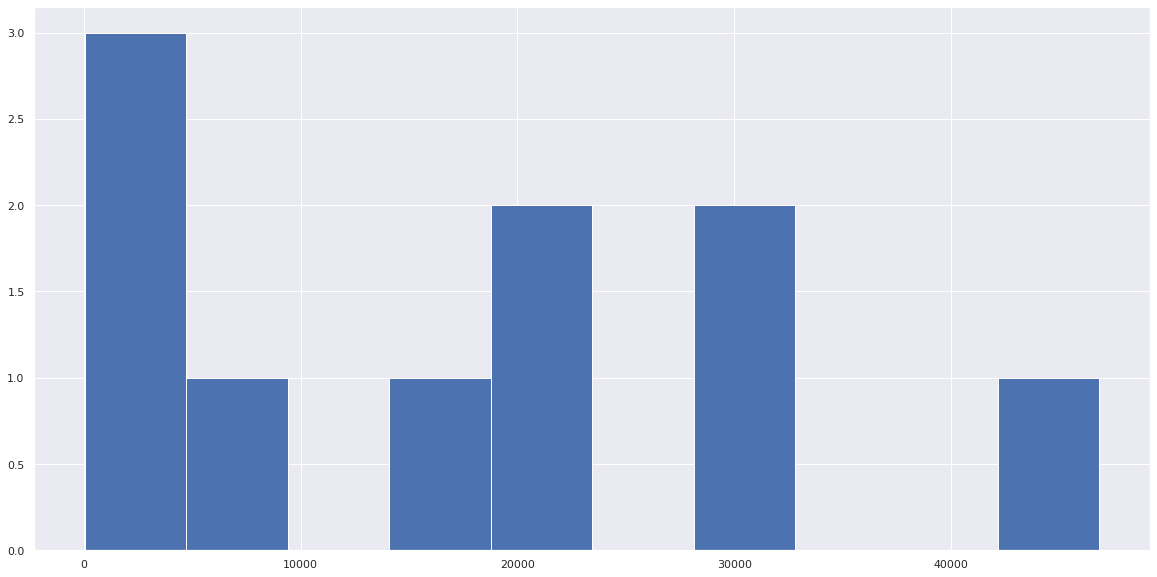

In [ ]:
top_res_neigh['Weighted Value'].hist()

The data was then filtered and then transformed to scale the assessed value, so we can plot the location of the properties on a map of Edmonton to get a better overall picture. The Weights column was also added to improve the accuracy of the findings.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
res_loc=res_df.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()


scaled_col=scale.fit_transform(res_loc.select_dtypes(include='float64'))
res_loc['Assessed Value']=scaled_col
res_loc['Weight']=weight_garage_res
res_loc

,Neighbourhood,Latitude,Longitude,Assessed Value,Weight
0,ABBOTTSFIELD,53.575179,-113.390262,0.742295,0.000964
1,ALBANY,53.629756,-113.555668,1.532301,0.002585
2,ALBERTA AVENUE,53.568410,-113.485053,0.644310,0.006063
3,ALDERGROVE,53.516683,-113.640756,-0.104438,0.004077
4,ALLARD,53.400861,-113.528908,-1.780959,0.007985
...,...,...,...,...,...
343,WINDSOR PARK,53.524566,-113.534756,0.009675,0.001514
344,WINTERBURN INDUSTRIAL AREA EAST,53.565769,-113.665856,0.606093,0.000005
345,WINTERBURN INDUSTRIAL AREA WEST,53.545089,-113.703119,0.306740,0.000010
346,WOODCROFT,53.566832,-113.556646,0.621478,0.001994


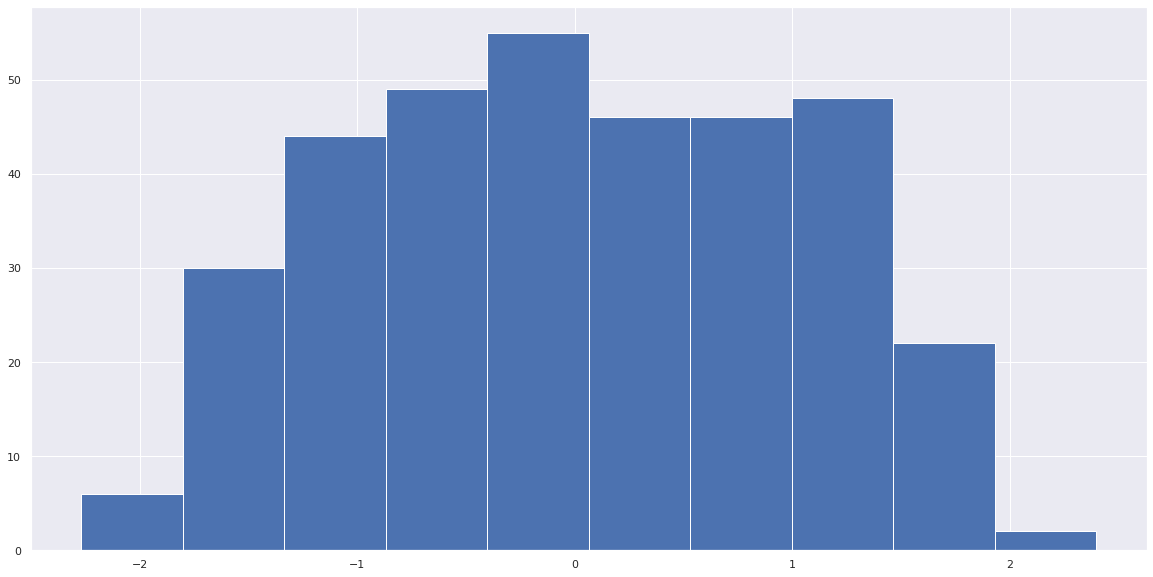

In [ ]:
res_loc['Assessed Value'].hist()

We do the same for the commercial properties.

In [ ]:
scale=StandardScaler()
comm_loc=comm_df.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()


scaled_col=scale.fit_transform(comm_loc.select_dtypes(include='float64'))
comm_loc['Assessed Value']=scaled_col
comm_loc['Weight']=weight_garage_comm
comm_loc

,Neighbourhood,Latitude,Longitude,Assessed Value,Weight
0,ABBOTTSFIELD,53.574297,-113.391304,0.741095,0.000406
1,ALBANY,53.631294,-113.550344,1.613476,0.001127
2,ALBERTA AVENUE,53.568335,-113.486800,0.649831,0.007846
3,ALBERTA PARK INDUSTRIAL,53.566116,-113.594852,0.615870,0.003382
4,ALDERGROVE,53.516514,-113.641140,-0.143339,0.001488
...,...,...,...,...,...
394,WOODCROFT,53.566703,-113.556383,0.624850,0.001398
395,YELLOWHEAD CORRIDOR EAST,53.581972,-113.463798,0.858568,0.008252
396,YELLOWHEAD CORRIDOR WEST,53.582881,-113.519193,0.872480,0.000271
397,YORK,53.602968,-113.429056,1.179920,0.003337


In [ ]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)
yeg_map

The map below shows a bubble plot of the residential properties in Edmonton. 

In [ ]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=10)

for neigh,lat,long,value,weight in zip(res_loc.Neighbourhood,res_loc.Latitude,res_loc.Longitude,res_loc['Assessed Value'],res_loc.Weight):
  if value > (res_loc['Assessed Value'].median()):
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='green',
      fill=True,
      fill_color='green'
   )
  else:
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='crimson',
      fill=True,
      fill_color='crimson'
   )
  yeg_map.add_child(circle)
  
yeg_map

As is evident by the bubble plot, South Edmonton has the highest residential property values in Edmonton. Meanwhile, North Edmonton has the second highest 

In [ ]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=10)

for neigh,lat,long,value,weight in zip(comm_loc.Neighbourhood,comm_loc.Latitude,comm_loc.Longitude,comm_loc['Assessed Value'],comm_loc.Weight):
  if value > (comm_loc['Assessed Value'].median()):
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='green',
      fill=True,
      fill_color='green'
   )
  else:
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='crimson',
      fill=True,
      fill_color='crimson'
   )
  yeg_map.add_child(circle)
  
yeg_map

In [ ]:
south_yeg=res_df.loc[res_df.Latitude< 53.518133]
south_yeg=south_yeg[['Neighbourhood','Latitude','Longitude','Assessed Value','Garage']]
south_yeg.head()

,Neighbourhood,Latitude,Longitude,Assessed Value,Garage
2,RIO TERRACE,53.507602,-113.578589,842000,Y
3,RAMSAY HEIGHTS,53.484560,-113.581913,292000,Y
10,SKYRATTLER,53.451067,-113.529489,170000,N
11,BEARSPAW,53.446537,-113.494391,408500,Y
13,ELMWOOD,53.517498,-113.603123,302500,Y


In [ ]:
north_yeg=res_df.loc[res_df.Latitude > 53.518133]
north_yeg=north_yeg[['Neighbourhood','Latitude','Longitude','Assessed Value','Garage']]
north_yeg.head()

,Neighbourhood,Latitude,Longitude,Assessed Value,Garage
0,MEADOWLARK PARK,53.521347,-113.596600,305500,Y
4,LAGO LINDO,53.638352,-113.487062,347500,Y
5,SHERWOOD,53.531090,-113.582809,274500,Y
6,GLENWOOD,53.534265,-113.611761,379500,Y
7,WEST MEADOWLARK PARK,53.525041,-113.607880,335500,Y


In [ ]:
print(south_yeg['Assessed Value'].mean())
north_yeg['Assessed Value'].mean()

375906.0088951067


328060.9080896827

In [ ]:
south_loc=south_yeg.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()
north_loc=north_yeg.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()

weight_south=south_yeg.groupby('Neighbourhood')['Garage'].count().reset_index()['Garage']
weight_north=north_yeg.groupby('Neighbourhood')['Garage'].count().reset_index()['Garage']
south_loc['Weight']=weight_south/sum(weight_south)
north_loc['Weight']=weight_north/sum(weight_north)

south_scale=scale.fit_transform(south_loc.select_dtypes(include='float64'))
north_scale=scale.fit_transform(north_loc.select_dtypes(include='float64'))

#north_loc['Assessed Value']=north_scale
#south_loc['Assessed Value']=south_scale

In [ ]:
print(south_loc.head(10))
north_loc.head(10)

                     Neighbourhood   Latitude   Longitude  Assessed Value  \
0                       ALDERGROVE  53.515489 -113.640354   298099.729242   
1                           ALLARD  53.400861 -113.528908   368528.256705   
2                        ALLENDALE  53.502760 -113.505688   455510.193680   
3                        AMBLESIDE  53.431063 -113.605656   294777.510684   
4                   ANTHONY HENDAY  53.514768 -113.660015   258400.000000   
5             ANTHONY HENDAY SOUTH  53.433127 -113.540596   304350.000000   
6  ANTHONY HENDAY SOUTH BLACKBURNE  53.437067 -113.503965    98863.636364   
7        ANTHONY HENDAY SOUTH EAST  53.436559 -113.422264   206718.750000   
8        ANTHONY HENDAY SOUTH WEST  53.483197 -113.649732   148035.714286   
9       ANTHONY HENDAY TERWILLEGAR  53.441143 -113.593420   234900.000000   

     Weight  
0  0.005784  
1  0.016349  
2  0.005121  
3  0.019544  
4  0.000026  
5  0.000104  
6  0.000115  
7  0.000167  
8  0.000219  
9  0.000078 

,Neighbourhood,Latitude,Longitude,Assessed Value,Weight
0,ABBOTTSFIELD,53.575179,-113.390262,189947.089947,0.001884
1,ALBANY,53.629756,-113.555668,218513.313609,0.005053
2,ALBERTA AVENUE,53.568410,-113.485053,249800.252313,0.011851
3,ALDERGROVE,53.519376,-113.641665,430770.875764,0.002447
4,ANTHONY HENDAY,53.540828,-113.659232,259432.432432,0.000184
5,ANTHONY HENDAY BIG LAKE,53.590133,-113.647727,148333.333333,0.000105
6,ANTHONY HENDAY CASTLEDOWNS,53.645517,-113.517872,296000.000000,0.000065
7,ANTHONY HENDAY CLAREVIEW,53.616513,-113.357244,55272.727273,0.000055
8,ANTHONY HENDAY ENERGY PARK,53.641565,-113.418920,106421.052632,0.000095
9,ANTHONY HENDAY HORSE HILL,53.631051,-113.379495,177181.818182,0.000055


In [ ]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)
se_mean=south_loc.loc[south_loc.Longitude > -113.4937]['Assessed Value'].median()
sw_mean=south_loc.loc[south_loc.Longitude < -113.4937]['Assessed Value'].median()

for neigh,lat,long,value,weigh in zip(south_loc.Neighbourhood,south_loc.Latitude,south_loc.Longitude,south_loc['Assessed Value'],south_loc.Weight):
  if long <-113.4937:
    if value < (sw_mean*0.70):
     circle=folium.Circle(
        location=[lat,long],
        popup=(value,sw_mean),
        radius=abs(value*weigh/10),
        color='green',
        fill=True,
        fill_color='green'
    )
    elif value in range(int((sw_mean*7.80)),int((sw_mean*1.30)),1):
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/100),
        color='orange',
        fill=True,
        fill_color='orange'
    )
    else:
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,sw_mean),
        radius=abs(value*weigh/10),
        color='crimson',
        fill=True,
        fill_color='crimson'
    )
  yeg_map.add_child(circle)
  
yeg_map

In [ ]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)

for neigh,lat,long,value,weigh in zip(south_loc.Neighbourhood,south_loc.Latitude,south_loc.Longitude,south_loc['Assessed Value'],south_loc.Weight):
  if long >-113.4937:
    if value < (se_mean*0.90):
     circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='green',
        fill=True,
        fill_color='green'
    )
    elif value in range(int((se_mean*0.90)),int((se_mean*1.10)),1):
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='orange',
        fill=True,
        fill_color='orange'
    )

    else:
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='crimson',
        fill=True,
        fill_color='crimson'
    )
  yeg_map.add_child(circle)
  
yeg_map

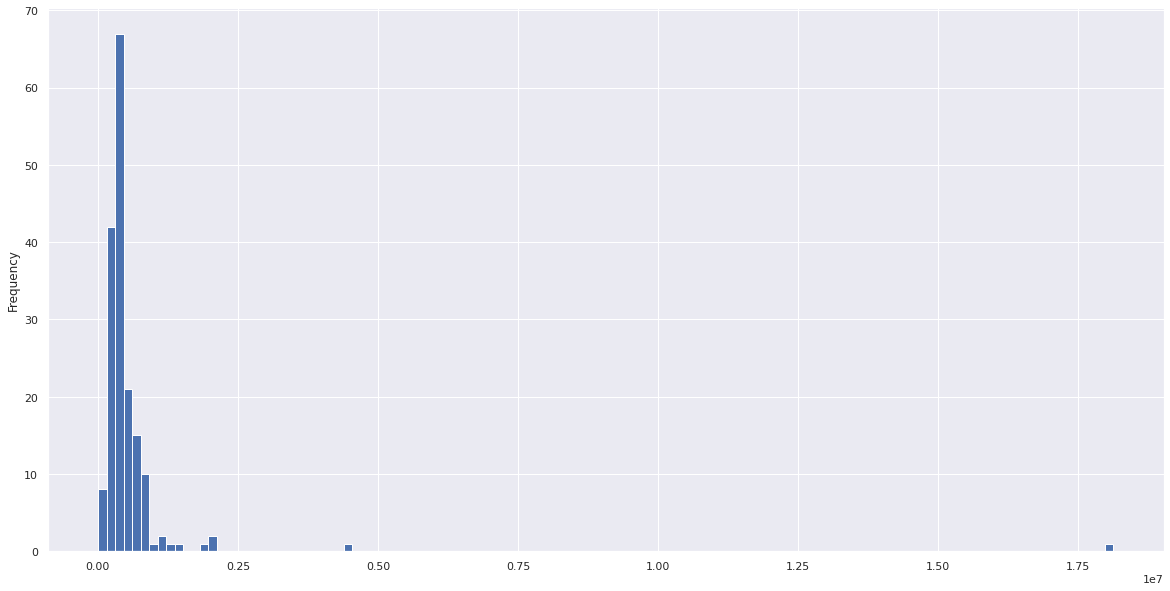

In [ ]:
south_loc['Assessed Value'].plot(kind='hist',bins=120)

## ML modelling


In [ ]:
cardinal=[]
for lat,long in zip(yeg_df.Latitude,yeg_df.Longitude):
  if lat > 53.5461:
    if long> -113.4937:
      point='NE'
      cardinal.append(point)
    else:
      point='NW'
      cardinal.append(point)
  elif lat < 53.5461:
    if long > -113.4937:
      point='SE'
      cardinal.append(point)
    else:
      point='SW'
      cardinal.append(point)

yeg_df['Cardinal Point']=cardinal
      

In [ ]:
yeg_df.head()

,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3,Cardinal Point
0,MEADOWLARK ROAD NW,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak,305500,53.521347,-113.596600,POINT (-113.59659970742774 53.52134664342154),100,0.0,0.0,RESIDENTIAL,NaN,NaN,SW
1,JASPER AVENUE NW,N,1150.0,OLIVER,O-day'min,62112000,53.541279,-113.511435,POINT (-113.51143504606169 53.541279206311984),95,5.0,0.0,OTHER RESIDENTIAL,COMMERCIAL,NaN,SW
2,RIO TERRACE DRIVE NW,Y,4430.0,RIO TERRACE,sipiwiyiniwak,842000,53.507602,-113.578589,POINT (-113.57858852769932 53.50760246690828),100,0.0,0.0,RESIDENTIAL,NaN,NaN,SW
3,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin,292000,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,0.0,0.0,RESIDENTIAL,NaN,NaN,SW
4,94 STREET NW,Y,2450.0,LAGO LINDO,tastawiyiniwak,347500,53.638352,-113.487062,POINT (-113.48706223339036 53.638351849064755),100,0.0,0.0,RESIDENTIAL,NaN,NaN,NE


In [ ]:
yeg_df.dtypes

Street Name              object
Garage                   object
Neighbourhood ID        float64
Neighbourhood            object
Ward                     object
Assessed Value            int64
Latitude                float64
Longitude               float64
Point Location           object
Assessment Class % 1      int64
Assessment Class % 2    float64
Assessment Class % 3    float64
Assessment Class 1       object
Assessment Class 2       object
Assessment Class 3       object
Cardinal Point           object
dtype: object

In [ ]:
yeg_df.isnull().sum()

Street Name              44449
Garage                       0
Neighbourhood ID             6
Neighbourhood                6
Ward                         6
Assessed Value               0
Latitude                     0
Longitude                    0
Point Location               0
Assessment Class % 1         0
Assessment Class % 2         0
Assessment Class % 3         0
Assessment Class 1           0
Assessment Class 2      414936
Assessment Class 3      415726
Cardinal Point               0
dtype: int64

In [ ]:
import math

yeg_df['x']=np.cos(yeg_df.Latitude)*np.cos(yeg_df.Longitude)
yeg_df['y']=np.cos(yeg_df.Latitude)*np.sin(yeg_df.Longitude)
yeg_df['z']=np.sin(yeg_df.Latitude)
 
yeg_df.drop(['Latitude','Longitude','Point Location'],axis=1,inplace=True)

In [ ]:
yeg_df.drop(['Assessment Class 2','Assessment Class 3','Street Name'],axis=1,inplace=True)

In [ ]:
yeg_df.head()

,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Cardinal Point,x,y,z
0,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak,305500,100,0.0,0.0,RESIDENTIAL,SW,-0.872209,0.475657,-0.114023
1,N,1150.0,OLIVER,O-day'min,62112000,95,5.0,0.0,OTHER RESIDENTIAL,SW,-0.907247,0.398748,-0.133802
2,Y,4430.0,RIO TERRACE,sipiwiyiniwak,842000,100,0.0,0.0,RESIDENTIAL,SW,-0.881940,0.460553,-0.100358
3,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin,292000,100,0.0,0.0,RESIDENTIAL,SW,-0.882217,0.464437,-0.077408
4,Y,2450.0,LAGO LINDO,tastawiyiniwak,347500,100,0.0,0.0,RESIDENTIAL,NE,-0.900384,0.369820,-0.229220


In [ ]:
model_df=yeg_df.sample(10000)
y=model_df['Assessed Value']
X=model_df.drop(['Assessed Value'],axis=1)

In [ ]:
dummy=pd.get_dummies(X.select_dtypes(include='object'))
dummy=dummy.fillna(0)
X=pd.concat([X,dummy],axis=1)

In [ ]:
X.drop(X.select_dtypes(include='object').columns.tolist(),axis=1,inplace=True)
X

,Neighbourhood ID,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,x,y,z,Garage_N,Garage_Y,Neighbourhood_ABBOTTSFIELD,...,Ward_sipiwiyiniwak,Ward_tastawiyiniwak,Assessment Class 1_COMMERCIAL,Assessment Class 1_FARMLAND,Assessment Class 1_OTHER RESIDENTIAL,Assessment Class 1_RESIDENTIAL,Cardinal Point_NE,Cardinal Point_NW,Cardinal Point_SE,Cardinal Point_SW
56371,1220.0,100,0.0,0.0,-0.912801,0.388549,-0.125795,1,0,0,...,0,0,0,0,1,0,0,0,0,1
16571,4310.0,100,0.0,0.0,-0.870161,0.479420,-0.113911,0,1,0,...,1,0,0,0,0,1,0,0,0,1
133176,2410.0,100,0.0,0.0,-0.914340,0.352287,-0.199691,0,1,0,...,0,1,0,0,0,1,1,0,0,0
72660,2660.0,100,0.0,0.0,-0.944493,0.287135,-0.159647,1,0,0,...,0,0,0,0,0,1,1,0,0,0
118091,6370.0,100,0.0,0.0,-0.953335,0.291844,-0.077331,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410746,2462.0,100,0.0,0.0,-0.912646,0.334559,-0.234833,1,0,0,...,0,1,0,0,0,1,1,0,0,0
191546,5511.0,100,0.0,0.0,-0.902379,0.429341,-0.037114,0,1,0,...,0,0,0,0,0,1,0,0,0,1
216641,2541.0,100,0.0,0.0,-0.931851,0.301616,-0.201696,0,1,0,...,0,0,0,0,0,1,1,0,0,0
385874,5458.0,100,0.0,0.0,-0.903671,0.428165,0.007360,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
X.drop(['Neighbourhood ID'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
linreg=LinearRegression()
logreg=LogisticRegression()
svr=SVR(kernel='linear')
models=[linreg,logreg,svr]

In [ ]:
results=[]
for mod in models:
   mod.fit(X_train,y_train)
   pred=mod.predict(X_test)
   score=mse(y_test,pred)
   results.append((mod,score))

results


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[(LinearRegression(), 6.991441373978644e+33),
 (LogisticRegression(), 1686888130535.7144),
 (SVR(kernel='linear'), 1601226293092.144)]